# Importing all necessary data and setting up the dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
df = pd.read_csv('/content/emissions.csv')
#to see what my dataset is comprised of
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


## Data pre-processing

In [3]:
print(df.dtypes)

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object


In [4]:
print(df.isnull().any())

Car       False
Model     False
Volume    False
Weight    False
CO2       False
dtype: bool


In [5]:
df = df.drop(['Car', 'Model'], axis=1)

<Axes: >

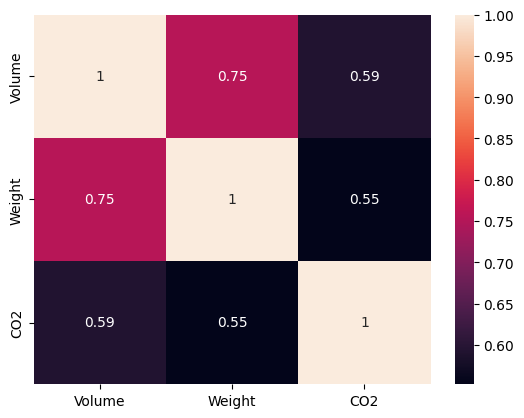

In [6]:
sns.heatmap(df.corr(), annot=True)

## Pair plot to check correlation

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


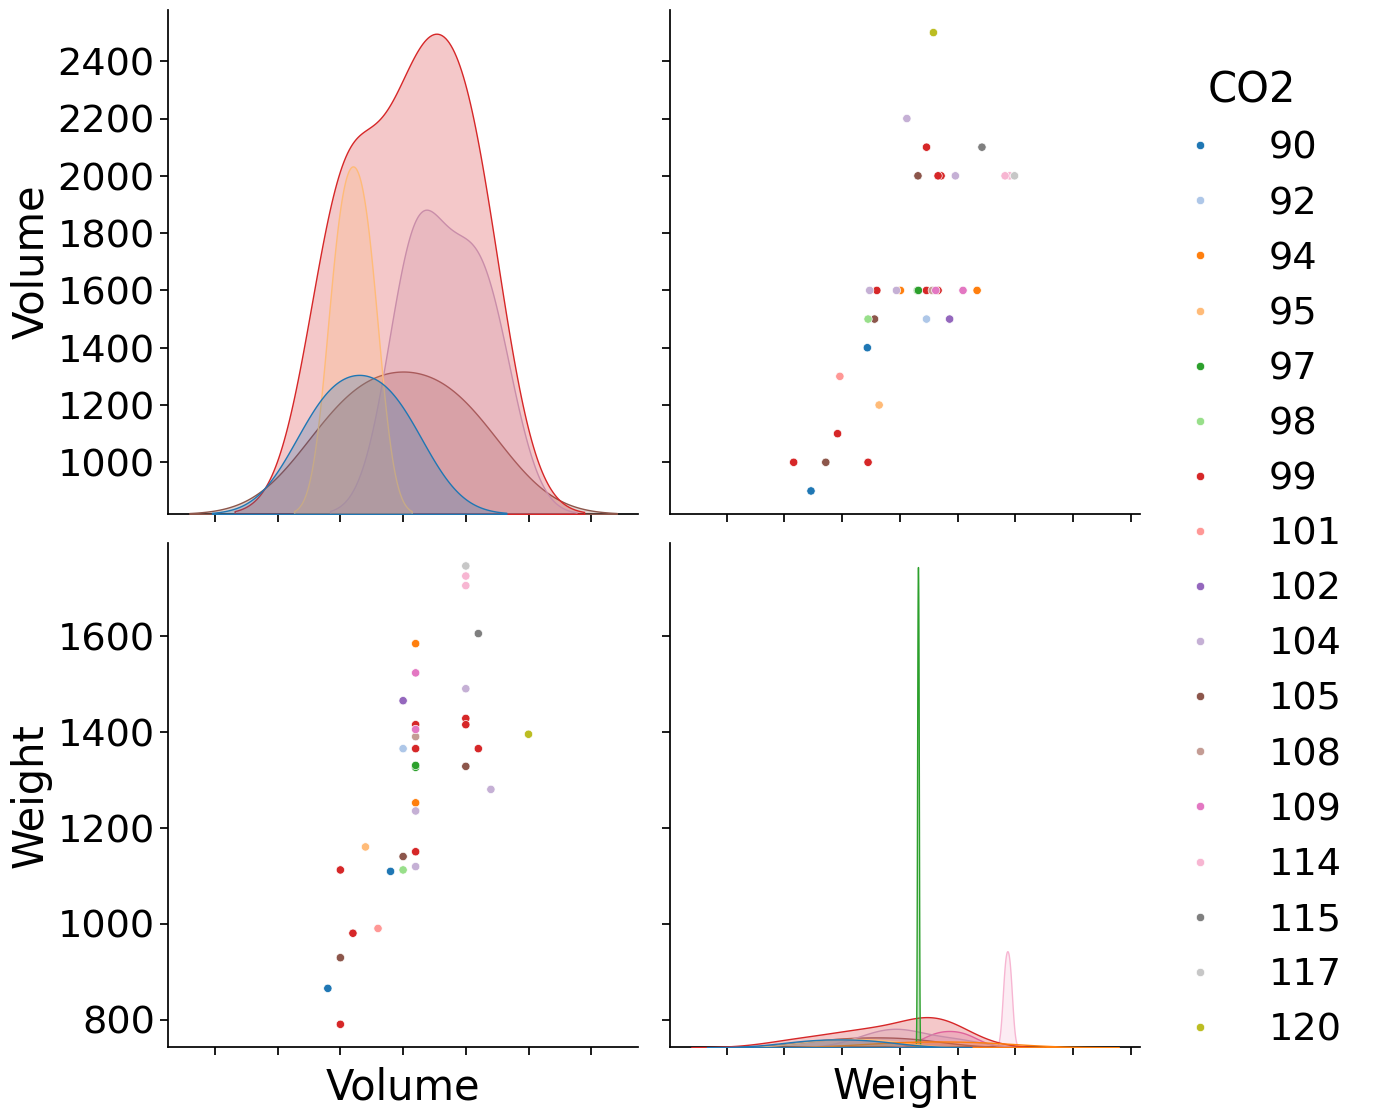

In [7]:
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(
        df[['Volume', "Weight", "CO2"]],
        hue="CO2",
        palette='tab20',
        size=6
    )

g.set(xticklabels=[]);

In [18]:
#separating independent and dependent variable
X = df.iloc[:,0:-1].values
y = df.iloc[:,2].values

#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept: ", regressor.intercept_)

y_pred = regressor.predict(X_test)

Intercept:  87.76296861622906


## Prediction y-values

In [20]:
print(y_pred)

[105.0294035  102.85078349 101.35958656 104.33820351 102.70401508
 101.12126741  97.39364743  96.77749669  97.99951003 104.75022964
 104.88641201 103.98383146]


# Running tests

### ANOVA test
Using the scipy inbuilt command. The p value is ideally 0.05, so if the final p value is less than that, the dataset is ideal for multi-linear regression.

In [21]:
from scipy.stats import f_oneway

f_oneway(df["Weight"], df["Volume"], df["CO2"])

F_onewayResult(statistic=325.3734223200118, pvalue=9.946727365037715e-46)

### F-test

In [22]:
import scipy.stats

def f_test(group1, group2):
   f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
   nun = X.size-1
   dun = y.size-1
   p_value = 1-scipy.stats.f.cdf(f, nun, dun)
   return f, p_value

# perform F-test
f_test(X, y)

(2325.9774942374797, 1.1102230246251565e-16)

### T-test

In [23]:
import numpy as np
from scipy import stats
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_1samp

seed=(1)
t_stat, p_value = ttest_1samp(X, popmean=155)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  [22.46073811 28.18254195]
P-Value:  [2.24964662e-22 1.20169851e-25]


### Variation Inflation Test (VIF)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(2)]

print(vif)

[43.09465920532496, 43.09465920532496]


The p-value being less than 0.05 and the collinearity being high and same indicate the given dataset can be implemented using multilinear regression and the columns are correctly identified.